In [3]:
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import numpy as np

#Gather neccessary data for 'map' visualisation

cols=[]
cols.append(7)
cols.append(8)
cols.append(9)

data2 = pd.read_csv("/Users/harry/Desktop/California Data/California_Census_Data copy.csv", header = None,usecols=cols, low_memory=False)

#pull out lists, remove non numbers



latitude = data2[8].tolist()
longitude = data2[9].tolist()

latitude.remove(latitude[0])
longitude.remove(longitude[0])

pop = data2[7].tolist()

pop.remove(pop[0])

pop2 = [float(x) for x in pop]
latitude2 = [float(x) for x in latitude]
longitude2 = [float(x) for x in longitude]


#random area scaling - only need relative ideas

pop_scaled = [int(i)/200000 for i in pop]
pd.options.display.max_rows = 4
print "California sample data"
data2

California sample data


,7,8,9
0,Total Population,Latitude,Longitude
1,0,37.8790118,122.2316537
...,...,...,...
710144,3,39.4567449,121.2883429
710145,3,39.4568332,121.288633


In [4]:
# create appropriate lists (remove description & Capital city data)


pop = pop2


#standard deviation calc

def find_sd(a):

    sum_ = sum(a)
    Expx=sum_/float(len(a))

    sq_dist = []
    for i in a:
        sq_dist.append((i-Expx)**2)
    b = sum(sq_dist)
    var = b/len(a)
    
    s_d = math.sqrt(var)
    return s_d




#standard deviation
sd_list=[]
sd_list.append(format(int(find_sd(pop)),',d'))




#maximum 
max_list=[max(pop)]


#minimum
min_list=[0]



#mean
def get_mean(a):
    return sum(a)/float(len(a))
mean =[get_mean(pop)]




#make new dataframe with basic statistics

basic_stats1 = pd.DataFrame({
 'minimum' : min_list,
 'maximum':max_list,'standard deviation' : sd_list,'mean': mean
  })
parameter=['Block population']
basic_stats = basic_stats1.set_index([parameter])
columnsTitles = ['mean', 'minimum', 'maximum','standard deviation']
basicstats = basic_stats.reindex(columns=columnsTitles)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
basic_stats.round()

print "California Census Block Basic Statistics"
basicstats.astype(int)

California Census Block Basic Statistics


,mean,minimum,maximum,standard deviation
Block population,52,0,7910,120


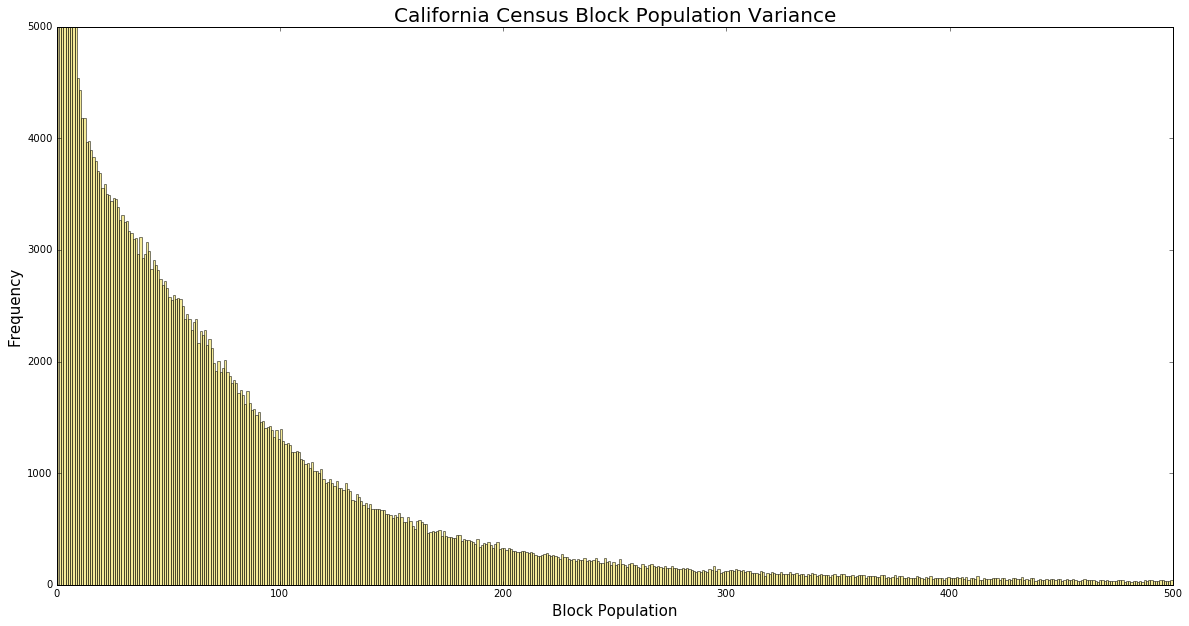

In [86]:
#make histogram of population 


bins = np.arange(min(pop), max(pop), 1)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(pop, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834')
plt.axis([0,500,0,5000])
plt.title("California Census Block Population Variance", fontsize = 20)
plt.xlabel("Block Population", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.plot();

In [5]:
cols=[]
for i in range(22,27):
    cols.append(i)
data3 = pd.read_csv("/Users/harry/Desktop/California Data/California_Census_Data copy.csv", header = None,usecols=cols, low_memory=False)
a = data3[23].tolist()
b = data3[24].tolist()
c = data3[25].tolist()
d = data3[26].tolist()
lst=[a,b,c,d]
for i in lst:
    i.remove(i[0])

urb_area=[float(i) for i in a]
urb_clust=[float(i) for i in b]
rural=[float(i) for i in c]
not_def=[float(i) for i in d]

y=[]
for i in [urb_area,urb_clust,rural,not_def]:
    y.append(sum(i))
    


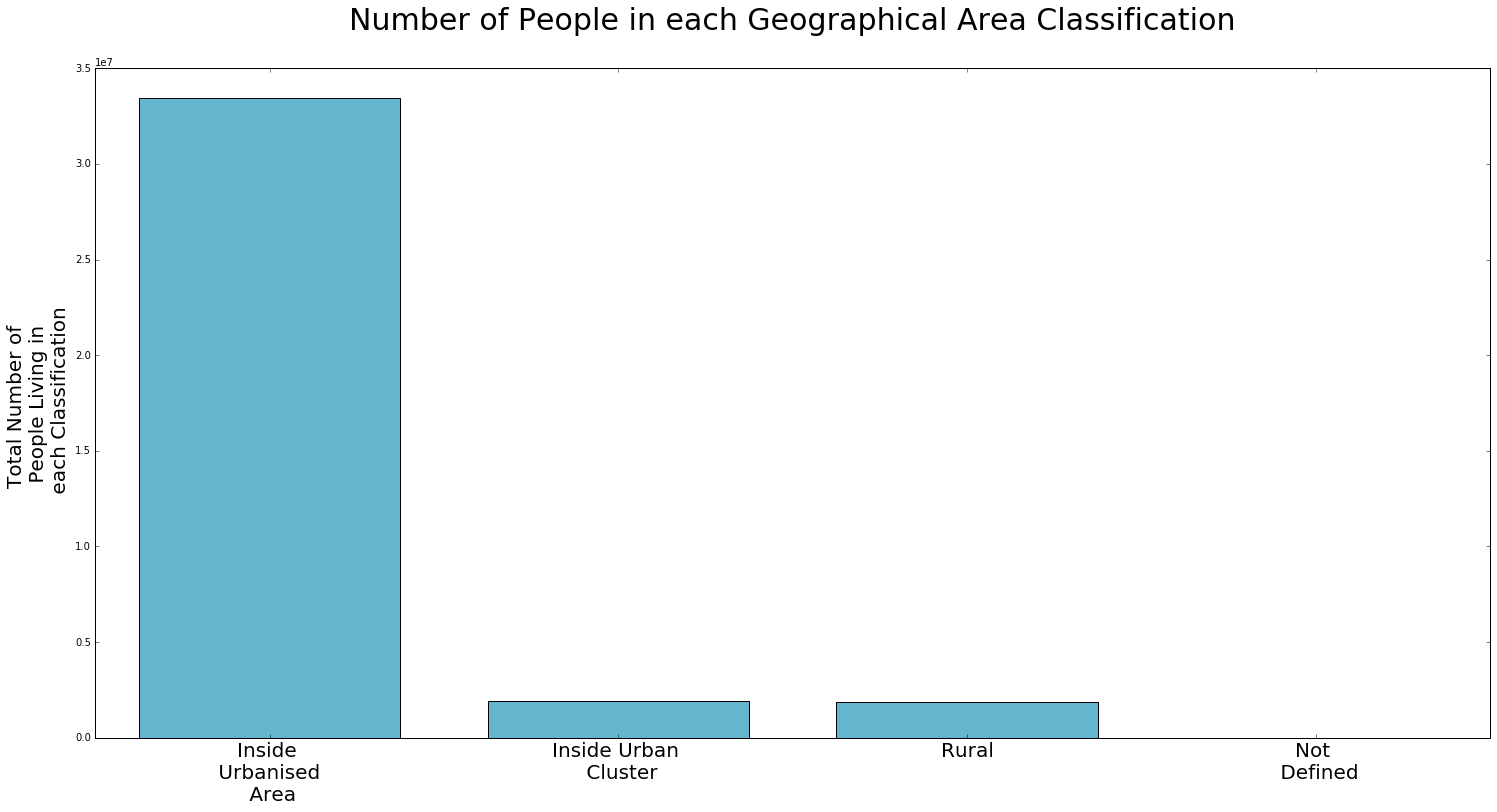

In [15]:
objects = ('Inside \n Urbanised \n Area', 'Inside Urban \n Cluster', 'Rural','Not \n Defined')

%matplotlib inline
plt.figure(figsize=(25,12))
plt.bar([20,40,60,80], y, align='center', width = 15, color='#64B5CD')
plt.xticks([20,40,60,80], objects, fontsize = 20)
plt.ylabel('Total Number of \n People Living in \n each Classification', fontsize =20 )
plt.title('Number of People in each Geographical Area Classification', fontsize = 30,position=(0.5, 1.05))

 
plt.show();

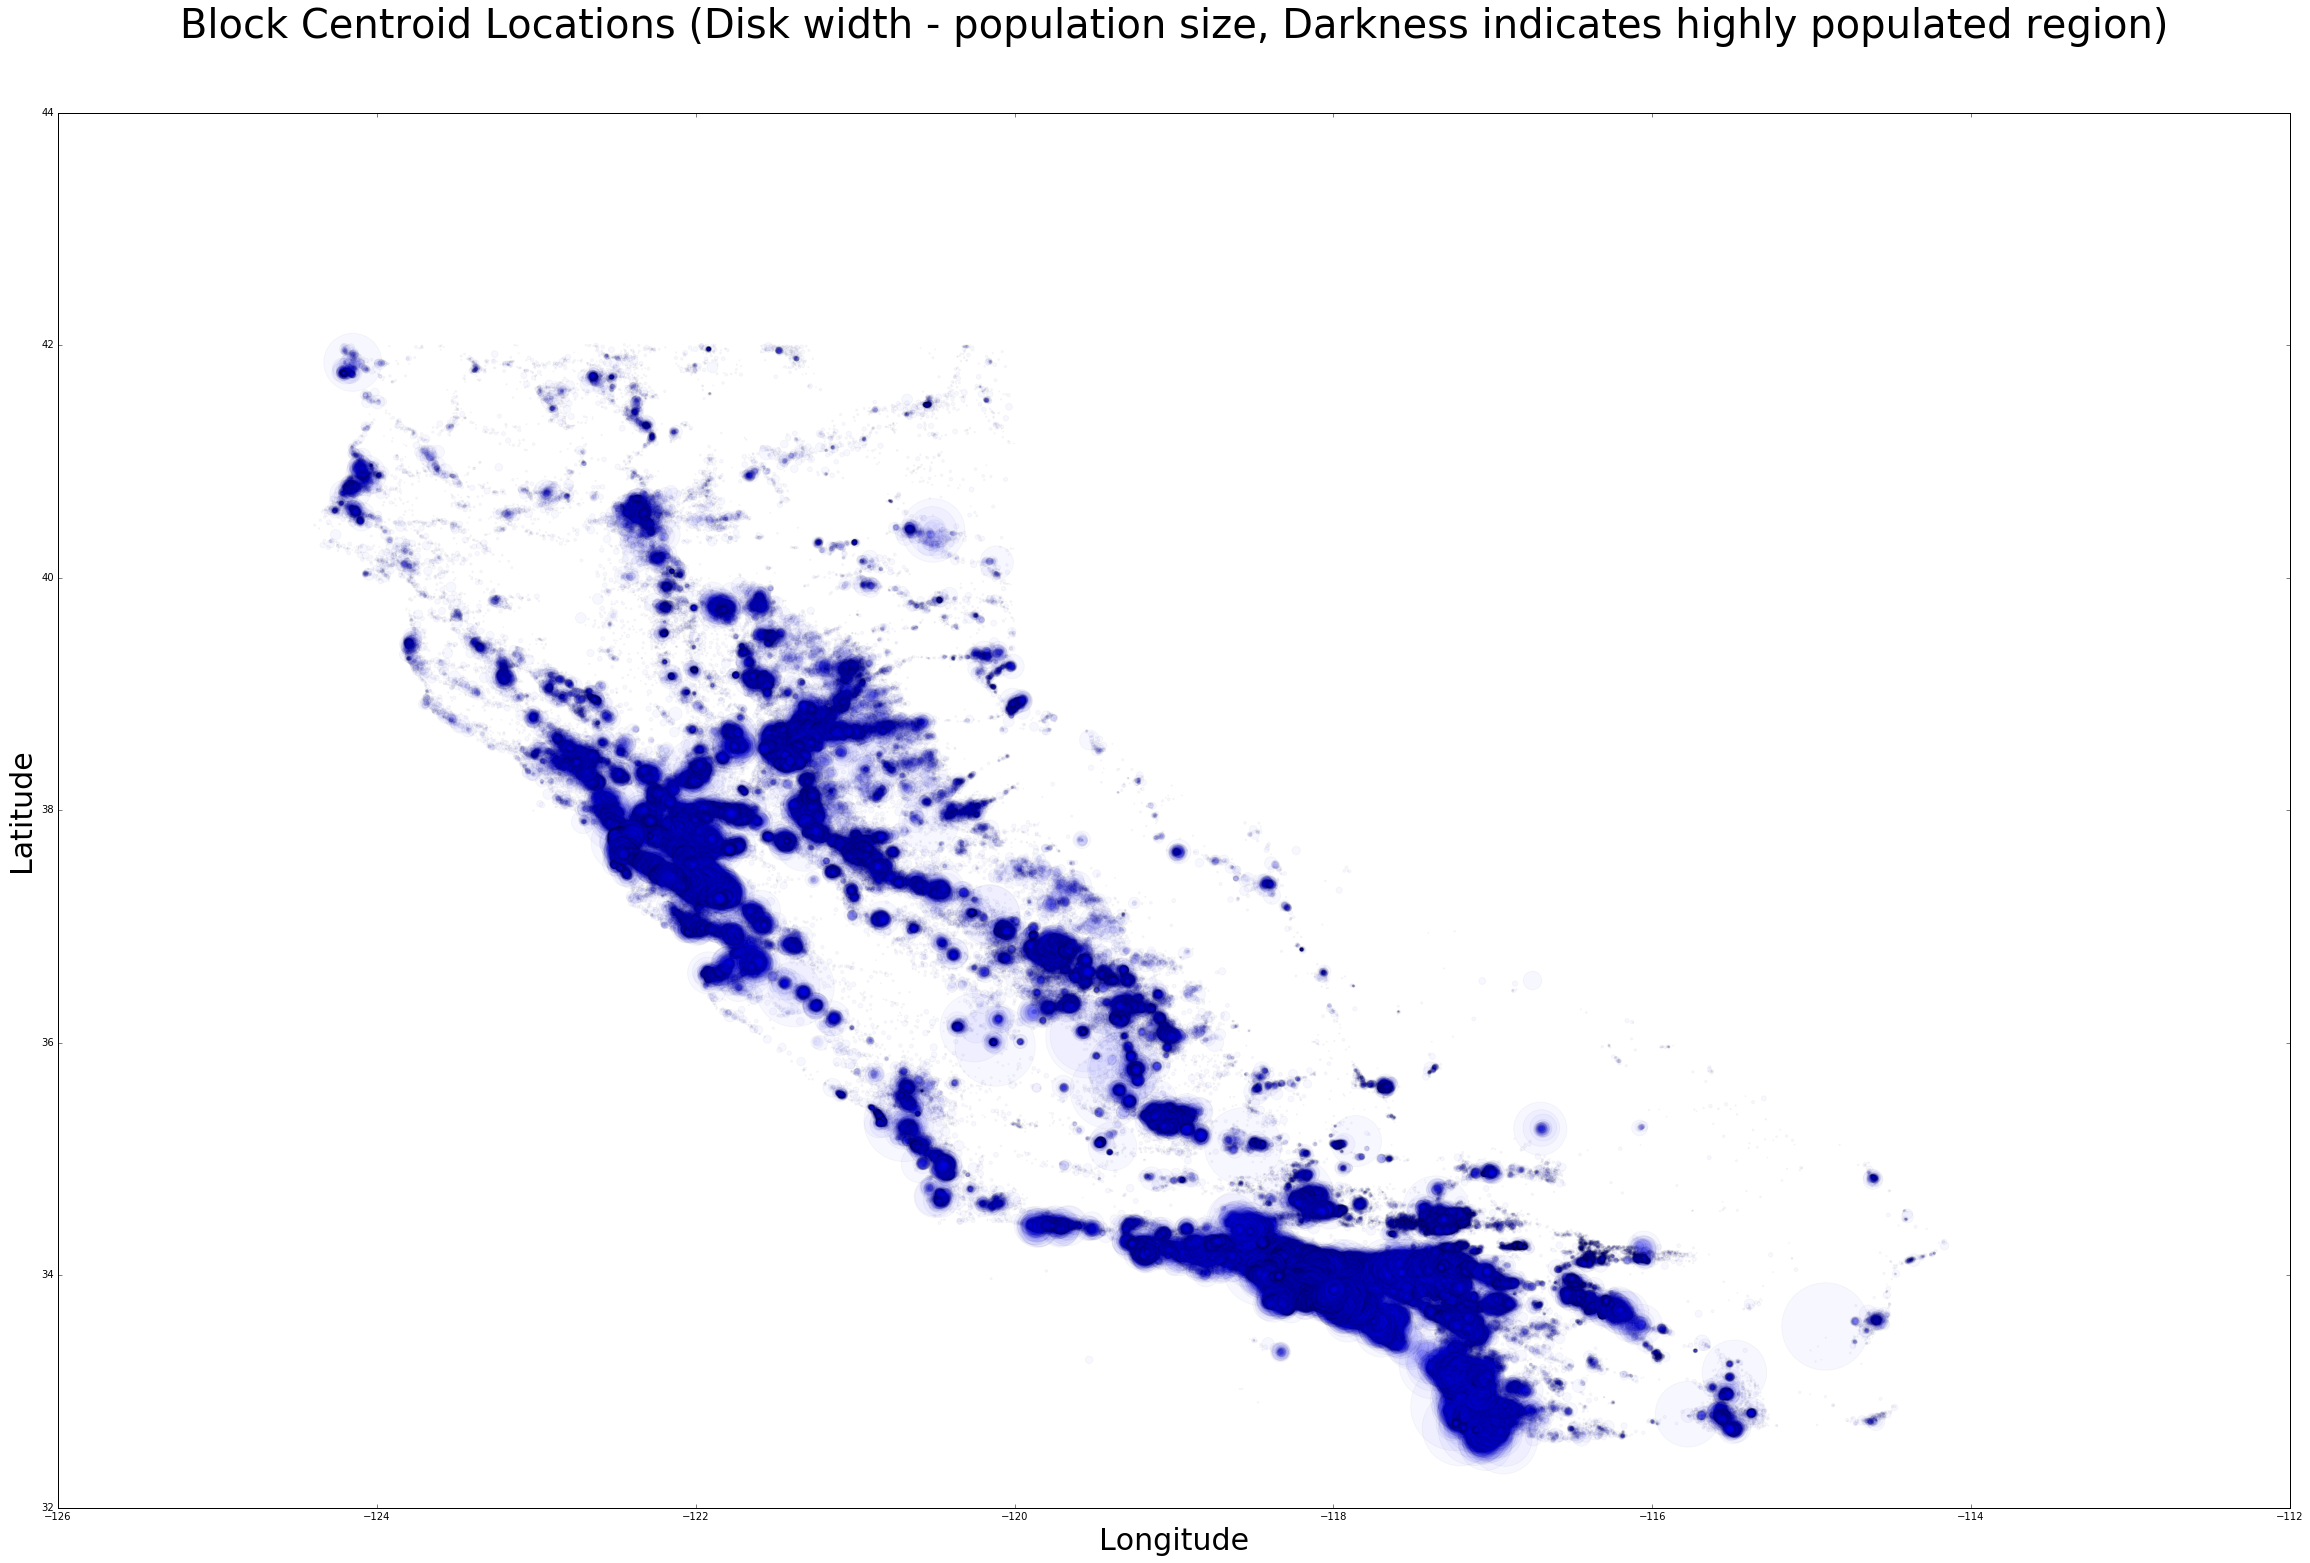

In [7]:
%matplotlib inline
plt.figure(figsize=(40,25))
plt.scatter(x = [-i for i in longitude2], y = latitude2, s= pop2, alpha = 0.03)
plt.title("Block Centroid Locations (Disk width - population size, Darkness indicates highly populated region)", fontsize=40, position =(0.5,1.05))
plt.xlabel("Longitude", fontsize=30)
plt.ylabel("Latitude" , fontsize = 30)